## Simple fractional crystallization model
- This notebook shows how to calculate the sulfide and sulfate saturation contents for a petrolog fractional crystallization path using a wide variety of different models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
pd.options.display.max_columns = None

## Import data 
- Here we have Ni and Cu contents in Petrolog, although in reality, its better to fit to observed Ni and Cu contents in your samples, as once you start to remove sulfide, you change Cu and Ni (alternatively an iterative model could be built of how these are removed).

In [2]:
df_out=ss.import_data('PetrologCalculations.xlsx', Petrolog=True)
df_out.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Fe2O3_Liq,FeO_Liq,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar
0,49.9010,0.9981,14.9715,8.981890,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098586,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.9839,8.0964,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1526.431,1
1,49.9978,1.0081,15.1220,8.952251,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097947,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.9743,8.0754,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,1516.580,1
2,50.0982,1.0185,15.2770,8.917591,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097380,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.9649,8.0492,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,1506.214,1
3,50.2003,1.0289,15.4337,8.878271,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.0,0.096919,489.9,102.6,50.2003,1.0289,15.4337,0.9561,8.0178,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.1029,489.9,102.6,0.9561,8.0178,0.1029,489.9,102.6,40.2069,0,0,0,12.3359,0,46.5096,0,0,0,0,0,7436.5,10.1,1222.361,1222.361,86.36,0.311,87.05,1,-8.05,-0.7,2.680,6.67,96.9959,0,N,0,3.0041,PetrologDefault,08:21:15,1495.511,1
4,50.3062,1.0397,15.5950,8.832931,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.0,0.096540,428.7,103.5,50.3062,1.0397,15.5950,0.9475,7.9802,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.1040,428.7,103.5,0.9475,7.9802,0.1040,428.7,103.5,40.1725,0,0,0,12.5558,0,46.3589,0,0,0,0,0,7162.8,10.2,1211.080,1211.080,85.84,0.312,86.81,1,-8.18,-0.7,2.679,6.83,95.9923,0,N,0,4.0077,PetrologDefault,08:21:15,1484.230,1


## Example 1 - SCSS calculations

### Example 1a: Calculate SCSS using Smythe
- First, we perform calculations using a Fe/FeNiCu ratio determined by measuring sulfides in the sample suite we are trying to model by quantitative EDS analysis (see Wieser et al. 2019)

In [34]:
Smythe_FixedSulf=ss.calculate_S2017_SCSS(df=df_out,
T_K=df_out['T_K'], P_kbar=df_out['P_kbar'], 
Fe3Fet_Liq=df_out['Fe3Fet_Liq'],
Fe_FeNiCu_Sulf=0.65)
Smythe_FixedSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS


,SCSS_ideal_ppm_Smythe2017,SCSS_ideal_ppm_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,Mn_wt_atom,Fe2_wt_atom,Fe3_wt_atom,Ca_wt_atom,Na_wt_atom,K_wt_atom,P_wt_atom,H_wt_atom,Si_XA_ideal,Ti_XA_ideal,Al_XA_ideal,Mg_XA_ideal,Fe2_XA_ideal,Ca_XA_ideal,Na_XA_ideal,K_XA_ideal,H_XA_ideal,Si*Fe_ideal,Si_XA_non_ideal,Ti_XA_non_ideal,Al_XA_non_ideal,Mg_XA_non_ideal,Fe2_XA_non_ideal,Ca_XA_non_ideal,Na_XA_non_ideal,K_XA_non_ideal,H_XA_non_ideal,Si*Fe_non_ideal,log_SCSS_ideal,Fe_FeNiCu_Sulf_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Fe2O3_Liq,FeO_Liq,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar
0,1163.723704,317.894143,1526.431,1,0.65,0.098586,0.458757,0.006900,0.162216,0.136727,0.000777,0.062247,0.006806,0.117974,0.044478,0.002341,0.000777,0.0,-12643.824134,-77.425187,-2992.932034,-1910.028590,-2133.454015,-923.839406,-589.182613,-67.922125,-0.0,3328.718114,-12843.561004,-73.937086,-3082.094530,-1984.246371,-2172.116681,-1041.903721,-609.907535,-66.914124,-0.0,3364.353000,7.059380,0.65,49.9010,0.9981,14.9715,8.981890,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098586,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.9839,8.0964,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1526.431,1
1,1132.276539,309.303728,1516.580,1,0.65,0.097947,0.460124,0.006977,0.164017,0.131794,0.000786,0.062150,0.006747,0.119284,0.044970,0.002367,0.000785,0.0,-12681.503374,-78.282101,-3026.156769,-1841.118249,-2130.129577,-934.095008,-595.703352,-68.673931,-0.0,3333.435458,-12881.835470,-74.755394,-3116.309063,-1912.658388,-2168.731998,-1053.469963,-616.657646,-67.654772,-0.0,3369.120844,7.031986,0.65,49.9978,1.0081,15.1220,8.952251,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097947,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.9743,8.0754,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,1516.580,1
2,1099.610160,300.380260,1506.214,1,0.65,0.097380,0.461536,0.007056,0.165873,0.126735,0.000794,0.062014,0.006689,0.120634,0.045480,0.002394,0.000794,0.0,-12720.419296,-79.173410,-3060.410799,-1770.448728,-2125.465969,-944.668326,-602.462163,-69.462733,-0.0,3336.344355,-12921.366154,-75.606549,-3151.583555,-1839.242869,-2163.983875,-1065.394524,-623.654203,-68.431868,-0.0,3372.060882,7.002711,0.65,50.0982,1.0185,15.2770,8.917591,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097380,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.9649,8.0492,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,1506.214,1
3,1066.362543,291.298016,1495.511,1,0.65,0.096919,0.462964,0.007136,0.167751,0.121654,0.000804,0.061837,0.006635,0.121999,0.045995,0.002421,0.000803,0.0,-12759.783453,-80.066191,-3095.062249,-1699.466956,-2119.406895,-955.359675,-609.279502,-70.252841,-0.0,3337.128525,-12961.352154,-76.459109,-3187.267307,-1765.50

#### plot results against FeO content

Text(0.5, 0, 'MgO Liq (Wt%)')

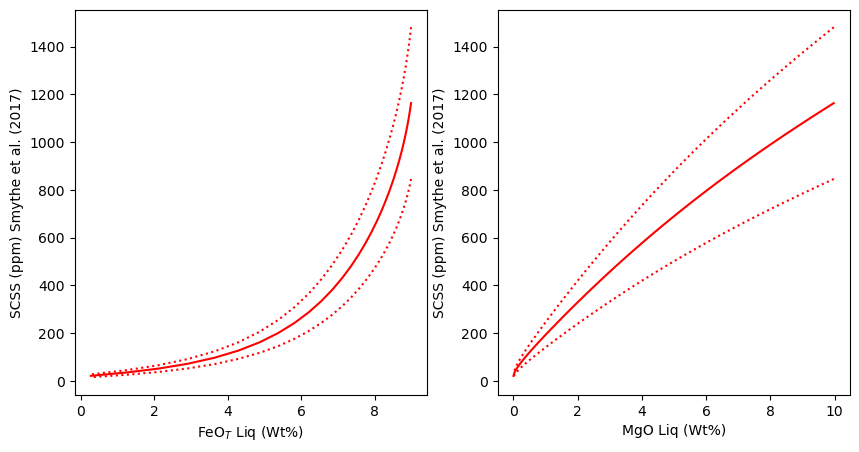

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Smythe_FixedSulf['FeOt_Liq'], Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017'],
         '-r')
ax1.plot(Smythe_FixedSulf['FeOt_Liq'], 
         Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017']+Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r')
ax1.plot(Smythe_FixedSulf['FeOt_Liq'], 
         Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017']-Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r')
ax1.set_ylabel('SCSS (ppm) Smythe et al. (2017)')
ax1.set_xlabel('FeO$_{T}$ Liq (Wt%)')

ax2.plot(Smythe_FixedSulf['MgO_Liq'], Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017'],
         '-r')
ax2.plot(Smythe_FixedSulf['MgO_Liq'], 
         Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017']+Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r')
ax2.plot(Smythe_FixedSulf['MgO_Liq'], 
         Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017']-Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r')
ax2.set_ylabel('SCSS (ppm) Smythe et al. (2017)')
ax2.set_xlabel('MgO Liq (Wt%)')

### Example 1b: Using the ONeill model

In [36]:
ONeill_FixedSulf=ss.calculate_O2021_SCSS(df=df_out, 
T_K=df_out['T_K'], P_kbar=df_out['P_kbar'], 
Fe3Fet_Liq=df_out['Fe3Fet_Liq'],
Fe_FeNiCu_Sulf=0.65)

ONeill_FixedSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


,SCSS2_ppm,LnS,Ln_a_FeO,Ln_a_FeS,DeltaG,LnCS2_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Fe2O3_Liq,FeO_Liq,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,Fe2_Liq_cat_frac
0,1117.612680,7.018950,-2.405570,-0.495103,7.309272,-2.200789,49.9010,0.9981,14.9715,8.981890,0.0998,9.9763,11.9772,2.4953,0.1996,0,0.0,0.098586,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.9839,8.0964,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1526.431,1,0.512742,0.152816,0.000869,0.077181,0.131861,0.090653,0.024856,0.001308,0.007714,0.0,0.459110,0.136831,0.000778,0.069108,0.118069,0.162342,0.044512,0.002343,0.006907,0.0,0.664416,0.687150,0.062295
1,1085.876342,6.990143,-2.401365,-0.495000,7.373234,-2.289456,49.9978,1.0081,15.1220,8.952251,0.1008,9.6064,12.0976,2.5203,0.2016,0,0.0,0.097947,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.9743,8.0754,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,1516.580,1,0.514942,0.147495,0.000879,0.077107,0.133500,0.091779,0.025164,0.001324,0.007810,0.0,0.460482,0.131896,0.000786,0.068952,0.119381,0.164145,0.045005,0.002369,0.006984,0.0,0.656686,0.679537,0.062199
2,1053.181390,6.959571,-2.397404,-0.494856,7.441489,-2.384467,50.0982,1.0185,15.2770,8.917591,0.1018,9.2279,12.2216,2.5462,0.2037,0,0.0,0.097380,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.9649,8.0492,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,1506.214,1,0.517220,0.142025,0.000890,0.076994,0.135193,0.092943,0.025484,0.001341,0.007909,0.0,0.461899,0.126834,0.000795,0.068759,0.120733,0.166005,0.045516,0.002396,0.007063,0.0,0.648452,0.671438,0.062063
3,1020.204752,6.927759,-2.393817,-0.494668,7.513007,-2.484397,50.2003,1.0289,15.4337,8.878271,0.1029,8.8486,12.3469,2.5723,0.2058,0,0.0,0.096919,489.9,102.6,50.2003,1.0289,15.4337,0.9561,8.0178,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.1029,489.9,102.6,0.9561,8.0178,0.1029,489.9,102.6,40.2069,0,0,0,12.3359,0,46.5096,0,0,0,0,0,7436.5,10.1,1222.361,1222.361,86.36,0.311,87.05,1,-8.05,-0.7,2.680,6.67,96.9959,0,N,0,3.0041,PetrologDefault,08:21:15,1495.511,1,0.519530,0.136517,0.000902,0.076840,0.136910,0.094124,0.025807,0.001359,0.008010,0.0,0.463333,0.121750,0.000804,0.068528,0.122101,0.167886,0.046032,0.002423,0.007143,0.0,0.639844,0.662987,0.061887
4,986.247523,6.893907,-2.390568,-0.494429,7.589560,-2.591792,50.3062,1.0397,15.5950,8.832931,0.1040,8.4612,12.4760,2.5992,0.2079,0,0.0,0.096540,428.7,103.5,50.3062,1.0397,15.5950,0.9475,7.9802,0.1040,8.4612,12.476

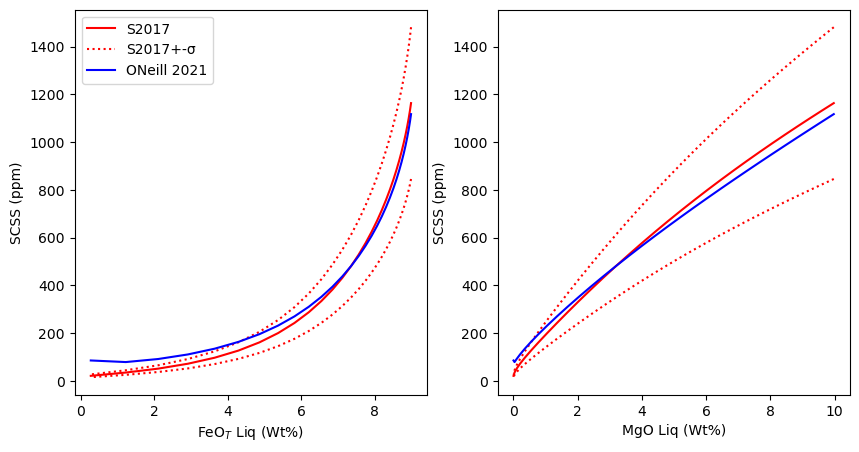

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Smythe_FixedSulf['FeOt_Liq'], Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017'],
         '-r', label='S2017')
ax1.plot(Smythe_FixedSulf['FeOt_Liq'], 
         Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017']+Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r', label='S2017+-σ')
ax1.plot(Smythe_FixedSulf['FeOt_Liq'], 
         Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017']-Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r')
ax1.plot(ONeill_FixedSulf['FeOt_Liq'], 
         ONeill_FixedSulf['SCSS2_ppm'],
         '-b', label='ONeill 2021')
ax1.set_ylabel('SCSS (ppm)')
ax1.set_xlabel('FeO$_{T}$ Liq (Wt%)')

ax2.plot(Smythe_FixedSulf['MgO_Liq'], Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017'],
         '-r')
ax2.plot(Smythe_FixedSulf['MgO_Liq'], 
         Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017']+Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r')
ax2.plot(Smythe_FixedSulf['MgO_Liq'], 
         Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017']-Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r')
ax2.plot(ONeill_FixedSulf['MgO_Liq'], 
         ONeill_FixedSulf['SCSS2_ppm'],
         '-b', label='ONeill 2021')
ax2.set_ylabel('SCSS (ppm)')
ax2.set_xlabel('MgO Liq (Wt%)')
ax1.legend()

### Example 1c: Using the Li and Zhang (2022 model)

In [38]:
LZ2022_FixedSulf=ss.calculate_LZ2022_SCSS(df=df_out, T_K=df_out['T_K'], 
P_kbar=df_out['P_kbar'], Fe3Fet_Liq=df_out['Fe3Fet_Liq'],
Fe_FeNiCu_Sulf=0.65)
LZ2022_FixedSulf.head()

replacing Fe3Fet_Liq in the original dataframe with that input into the function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,SCSS_Tot,Fe_FeNiCu_Sulf,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Fe2O3_Liq,FeO_Liq,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar
0,944.845509,0.65,49.9010,0.9981,14.9715,8.981890,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098586,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.9839,8.0964,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1526.431,1
1,918.781925,0.65,49.9978,1.0081,15.1220,8.952251,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097947,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.9743,8.0754,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,1516.580,1
2,891.790293,0.65,50.0982,1.0185,15.2770,8.917591,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097380,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.9649,8.0492,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,1506.214,1
3,864.400628,0.65,50.2003,1.0289,15.4337,8.878271,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.0,0.096919,489.9,102.6,50.2003,1.0289,15.4337,0.9561,8.0178,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.1029,489.9,102.6,0.9561,8.0178,0.1029,489.9,102.6,40.2069,0,0,0,12.3359,0,46.5096,0,0,0,0,0,7436.5,10.1,1222.361,1222.361,86.36,0.311,87.05,1,-8.05,-0.7,2.680,6.67,96.9959,0,N,0,3.0041,PetrologDefault,08:21:15,1495.511,1
4,836.070442,0.65,50.3062,1.0397,15.5950,8.832931,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.0,0.096540,428.7,103.5,50.3062,1.0397,15.5950,0.9475,7.9802,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.1040,428.7,103.5,0.9475,7.9802,0.1040,428.7,103.5,40.1725,0,0,0,12.5558,0,46.3589,0,0,0,0,0,7162.8,10.2,1211.080,1211.080,85.84,0.312,86.81,1,-8.18,-0.7,2.679,6.83,95.9923,0,N,0,4.0077,PetrologDefault,08:21:15,1484.230,1


## Calculate expected FC trajectory

In [53]:
FC=ss.crystallize_S_incomp(S_init=1000, F_melt=df_out['Melt_%_magma']/100)

## Simple figure for paper

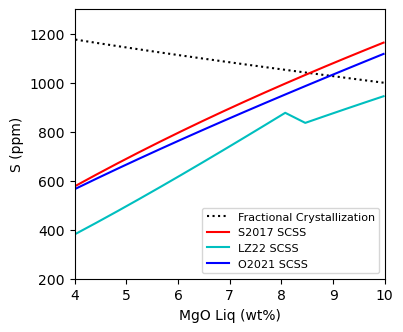

In [62]:
fig, (ax1) = plt.subplots(1, 1, figsize=(4,3.5))
ax1.plot(df_out['MgO_Liq'], FC, ':k', label='Fractional Crystallization')
ax1.plot(Smythe_FixedSulf['MgO_Liq'], Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017'], '-r', label='S2017 SCSS')
ax1.plot(LZ2022_FixedSulf['MgO_Liq'], LZ2022_FixedSulf['SCSS_Tot'], '-c', label='LZ22 SCSS')
ax1.plot(ONeill_FixedSulf['MgO_Liq'],  ONeill_FixedSulf['SCSS2_ppm'], '-b', label='O2021 SCSS')
ax1.set_ylabel('S (ppm)')
ax1.set_xlabel('MgO Liq (wt%)')
ax1.legend(fontsize=8)
plt.xlim([4, 10])
plt.ylim([200, 1300])
fig.savefig('SCSS_Models.png', dpi=200, bbox_inches='tight')

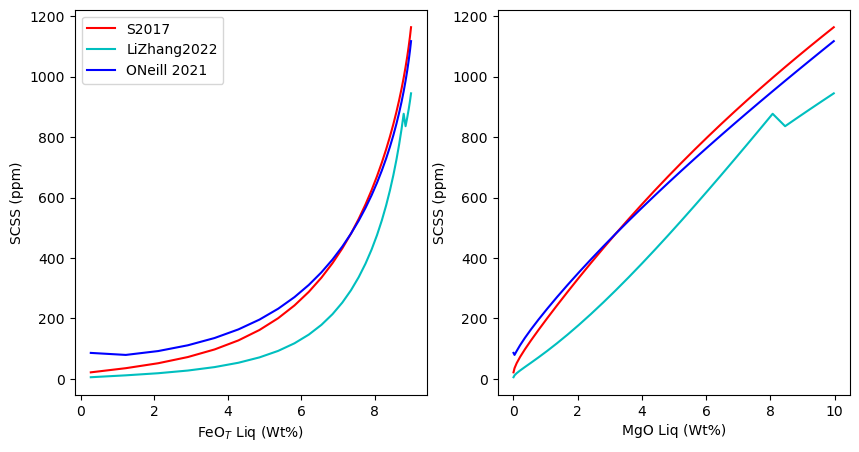

In [8]:

                         
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(Smythe_FixedSulf['FeOt_Liq'], Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017'],
         '-r', label='S2017')
ax1.plot(LZ2022_FixedSulf['FeOt_Liq'], 
         LZ2022_FixedSulf['SCSS_Tot'],
         '-c', label='LiZhang2022')
ax1.plot(ONeill_FixedSulf['FeOt_Liq'], 
         ONeill_FixedSulf['SCSS2_ppm'],
         '-b', label='ONeill 2021')
ax1.set_ylabel('SCSS (ppm)')
ax1.set_xlabel('FeO$_{T}$ Liq (Wt%)')

ax2.plot(Smythe_FixedSulf['MgO_Liq'], Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017'],
         '-r')
ax2.plot(LZ2022_FixedSulf['MgO_Liq'], 
         LZ2022_FixedSulf['SCSS_Tot'],
         '-c', label='LiZhang2022')
ax2.plot(ONeill_FixedSulf['MgO_Liq'], 
         ONeill_FixedSulf['SCSS2_ppm'],
         '-b', label='ONeill 2021')
ax2.set_ylabel('SCSS (ppm)')
ax2.set_xlabel('MgO Liq (Wt%)')
ax1.legend()

### Example 1d - Calculated sulfide composition
- We can use the Smythe 2017 SCSS model with the Symthe or ONeill calc sulfide model


In [9]:
Smythe_ONeillSulf=ss.calculate_S2017_SCSS(df=df_out, T_K=df_out['T_K'], 
P_kbar=df_out['P_kbar'], Fe_FeNiCu_Sulf="Calc_ONeill",
Ni_Liq=df_out['Ni_Liq_ppm'],
Cu_Liq=df_out['Cu_Liq_ppm'], 
Fe3Fet_Liq=df_out['Fe3Fet_Liq'])

Smythe_ONeillSulf.head()

You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS


,SCSS_ideal_ppm_Smythe2017,SCSS_ideal_ppm_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,Mn_wt_atom,Fe2_wt_atom,Fe3_wt_atom,Ca_wt_atom,Na_wt_atom,K_wt_atom,P_wt_atom,H_wt_atom,Si_XA_ideal,Ti_XA_ideal,Al_XA_ideal,Mg_XA_ideal,Fe2_XA_ideal,Ca_XA_ideal,Na_XA_ideal,K_XA_ideal,H_XA_ideal,Si*Fe_ideal,Si_XA_non_ideal,Ti_XA_non_ideal,Al_XA_non_ideal,Mg_XA_non_ideal,Fe2_XA_non_ideal,Ca_XA_non_ideal,Na_XA_non_ideal,K_XA_non_ideal,H_XA_non_ideal,Si*Fe_non_ideal,log_SCSS_ideal,Fe_FeNiCu_Sulf_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Fe2O3_Liq,FeO_Liq,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar,Fe_FeNiCu_Sulf_calc
0,737.196252,201.379734,1526.431,1,0.411762,0.098586,0.458757,0.006900,0.162216,0.136727,0.000777,0.062247,0.006806,0.117974,0.044478,0.002341,0.000777,0.0,-12643.824134,-77.425187,-2992.932034,-1910.028590,-2133.454015,-923.839406,-589.182613,-67.922125,-0.0,3328.718114,-12843.561004,-73.937086,-3082.094530,-1984.246371,-2172.116681,-1041.903721,-609.907535,-66.914124,-0.0,3364.353000,6.602854,0.411762,49.9010,0.9981,14.9715,8.981890,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098586,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.9839,8.0964,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1526.431,1,0.411762
1,751.738409,205.352212,1516.580,1,0.431546,0.097947,0.460124,0.006977,0.164017,0.131794,0.000786,0.062150,0.006747,0.119284,0.044970,0.002367,0.000785,0.0,-12681.503374,-78.282101,-3026.156769,-1841.118249,-2130.129577,-934.095008,-595.703352,-68.673931,-0.0,3333.435458,-12881.835470,-74.755394,-3116.309063,-1912.658388,-2168.731998,-1053.469963,-616.657646,-67.654772,-0.0,3369.120844,6.622388,0.431546,49.9978,1.0081,15.1220,8.952251,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097947,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.9743,8.0754,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,1516.580,1,0.431546
2,764.925374,208.954492,1506.214,1,0.452162,0.097380,0.461536,0.007056,0.165873,0.126735,0.000794,0.062014,0.006689,0.120634,0.045480,0.002394,0.000794,0.0,-12720.419296,-79.173410,-3060.410799,-1770.448728,-2125.465969,-944.668326,-602.462163,-69.462733,-0.0,3336.344355,-12921.366154,-75.606549,-3151.583555,-1839.242869,-2163.983875,-1065.394524,-623.654203,-68.431868,-0.0,3372.060882,6.639778,0.452162,50.0982,1.0185,15.2770,8.917591,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097380,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.9649,8.0492,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,1506.214,1,0.452162
3,775.958706,211.968465,1495.511,1,0.472985,0.096919,0.462964,0.007136,0.167751,0.121654,0.000804,0.061837,0.006635,0.121999,0.045995,0.002421,0.000803,0.0,-12759.783453,-80.066191,-3095.062249,-1699.466956,-2119.406895,-955.359675,-609.279502,-70

In [10]:
Smythe_SmytheSulf=ss.calculate_S2017_SCSS(df=df_out, T_K=df_out['T_K'], 
P_kbar=df_out['P_kbar'], Fe_FeNiCu_Sulf="Calc_Smythe", Ni_Liq=df_out['Ni_Liq_ppm'],
Cu_Liq=df_out['Cu_Liq_ppm'], Fe3Fet_Liq=df_out['Fe3Fet_Liq'])

Smythe_SmytheSulf.head()

,SCSS_ideal_ppm_Smythe2017,SCSS_ideal_ppm_Smythe2017_1sigma,SCSS_non_ideal_ppm_Smythe2017,SCSS_non_ideal_ppm_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,Mn_wt_atom,Fe2_wt_atom,Fe3_wt_atom,Ca_wt_atom,Na_wt_atom,K_wt_atom,P_wt_atom,H_wt_atom,Ni_Sulf_Calc,Cu_Sulf_Calc,Fe_Sulf_Calc,O_Sulf_Calc,S_Sulf_Calc,Si_XA_ideal,Ti_XA_ideal,Al_XA_ideal,Mg_XA_ideal,Fe2_XA_ideal,Ca_XA_ideal,Na_XA_ideal,K_XA_ideal,H_XA_ideal,Si*Fe_ideal,Si_XA_non_ideal,Ti_XA_non_ideal,Al_XA_non_ideal,Mg_XA_non_ideal,Fe2_XA_non_ideal,Ca_XA_non_ideal,Na_XA_non_ideal,K_XA_non_ideal,H_XA_non_ideal,Si*Fe_non_ideal,log_SCSS_ideal,log_SCSS_non_ideal,Fe_FeNiCu_Sulf_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Fe2O3_Liq,FeO_Liq,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar
0,404.195184,110.413907,416.686581,111.379940,1526.431,1,0.225764,0.098586,0.458757,0.006900,0.162216,0.136727,0.000777,0.062247,0.006806,0.117974,0.044478,0.002341,0.000777,0.0,30.0,24.842860,14.689701,0.617110,29.850329,-12643.824134,-77.425187,-2992.932034,-1910.028590,-2133.454015,-923.839406,-589.182613,-67.922125,-0.0,3328.718114,-12843.561004,-73.937086,-3082.094530,-1984.246371,-2172.116681,-1041.903721,-609.907535,-66.914124,-0.0,3364.353000,6.001898,6.032334,0.225764,49.9010,0.9981,14.9715,8.981890,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098586,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.9839,8.0964,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1526.431,1
1,426.667020,116.552534,435.701384,116.462580,1516.580,1,0.244934,0.097947,0.460124,0.006977,0.164017,0.131794,0.000786,0.062150,0.006747,0.119284,0.044970,0.002367,0.000785,0.0,30.0,23.312076,15.905296,0.613639,30.168989,-12681.503374,-78.282101,-3026.156769,-1841.118249,-2130.129577,-934.095008,-595.703352,-68.673931,-0.0,3333.435458,-12881.835470,-74.755394,-3116.309063,-1912.658388,-2168.731998,-1053.469963,-616.657646,-67.654772,-0.0,3369.120844,6.056004,6.076957,0.244934,49.9978,1.0081,15.1220,8.952251,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097947,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.9743,8.0754,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,1516.580,1
2,450.365715,123.026301,455.213601,121.678177,1506.214,1,0.266220,0.097380,0.461536,0.007056,0.165873,0.126735,0.000794,0.062014,0.006689,0.120634,0.045480,0.002394,0.000794,0.0,30.0,21.619454,17.249270,0.609589,30.521687,-12720.419296,-79.173410,-3060.410799,-1770.448728,-2125.465969,-944.668326,-602.462163,-69.462733,-0.0,3336.344355,-12921.366154,-75.606549,-3151.583555,-1839.242869,-2163.983875,-1065.394524,-623.654203,-68.431868,-0.0,3372.060882,6.110060,6.120767,0.266220,50.0982,1.0185,15.2770,8.917591,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097380,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.9649,8.0492,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1

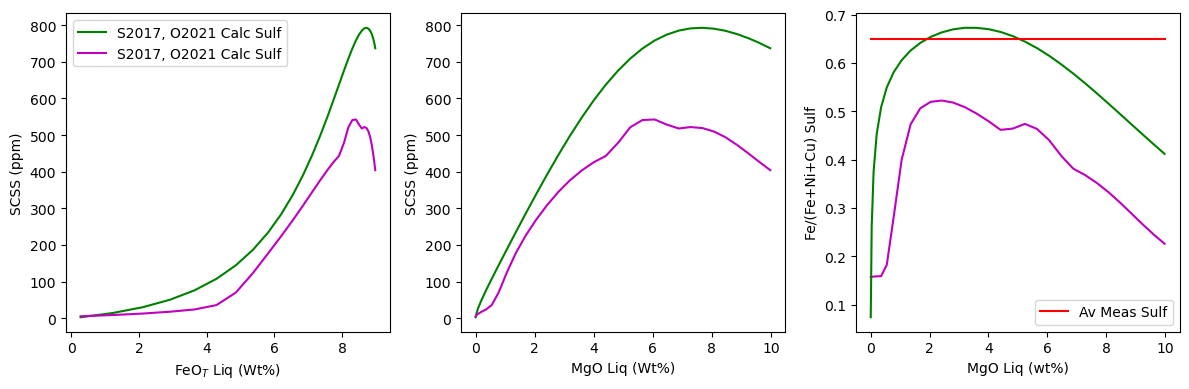

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.plot(Smythe_ONeillSulf['FeOt_Liq'], Smythe_ONeillSulf['SCSS_ideal_ppm_Smythe2017'],
         '-g', label='S2017, O2021 Calc Sulf')

ax1.plot(Smythe_SmytheSulf['FeOt_Liq'], 
         Smythe_SmytheSulf['SCSS_ideal_ppm_Smythe2017'],
         '-m', label='S2017, O2021 Calc Sulf')
ax1.set_ylabel('SCSS (ppm)')
ax1.set_xlabel('FeO$_{T}$ Liq (Wt%)')

ax2.plot(Smythe_ONeillSulf['MgO_Liq'], Smythe_ONeillSulf['SCSS_ideal_ppm_Smythe2017'],
         '-g')
ax2.plot(Smythe_SmytheSulf['MgO_Liq'], 
         Smythe_SmytheSulf['SCSS_ideal_ppm_Smythe2017'],
         '-m', label='S2017, S2017 Calc Sulf')
ax2.set_ylabel('SCSS (ppm)')
ax2.set_xlabel('MgO Liq (Wt%)')
ax1.legend()


ax3.plot(Smythe_SmytheSulf['MgO_Liq'],
         Smythe_SmytheSulf['Fe_FeNiCu_Sulf'],
         '-m')
ax3.plot(Smythe_ONeillSulf['MgO_Liq'],
         Smythe_ONeillSulf['Fe_FeNiCu_Sulf'],
         '-g')
ax3.plot([0, 10], [0.65, 0.65], '-r', label='Av Meas Sulf')
ax3.legend()
ax3.set_ylabel('Fe/(Fe+Ni+Cu) Sulf')
ax3.set_xlabel('MgO Liq (wt%)')
fig.tight_layout()

## Example 2: SCAS models
- This petrolog model is for Hawaii, so it is unlikely you would ever want to calculate SCAS, but just incase, we show how to do it here!

In [12]:
CD19_SCAS=ss.calculate_CD2019_SCAS(df=df_out, T_K=df_out['T_K'])
ZT22_SCAS=ss.calculate_ZT2022_SCAS(df=df_out, T_K=df_out['T_K'])

In [13]:
CD19_SCAS.head()

,Calc SCAS (ppm),SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Fe2O3_Liq,FeO_Liq,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar
0,22381.444377,49.9010,0.9981,14.9715,8.981890,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098586,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.9839,8.0964,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1526.431,1
1,24251.669845,49.9978,1.0081,15.1220,8.952251,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097947,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.9743,8.0754,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,1516.580,1
2,26332.282146,50.0982,1.0185,15.2770,8.917591,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097380,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.9649,8.0492,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,1506.214,1
3,28603.190164,50.2003,1.0289,15.4337,8.878271,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.0,0.096919,489.9,102.6,50.2003,1.0289,15.4337,0.9561,8.0178,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.1029,489.9,102.6,0.9561,8.0178,0.1029,489.9,102.6,40.2069,0,0,0,12.3359,0,46.5096,0,0,0,0,0,7436.5,10.1,1222.361,1222.361,86.36,0.311,87.05,1,-8.05,-0.7,2.680,6.67,96.9959,0,N,0,3.0041,PetrologDefault,08:21:15,1495.511,1
4,31130.351680,50.3062,1.0397,15.5950,8.832931,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.0,0.096540,428.7,103.5,50.3062,1.0397,15.5950,0.9475,7.9802,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.1040,428.7,103.5,0.9475,7.9802,0.1040,428.7,103.5,40.1725,0,0,0,12.5558,0,46.3589,0,0,0,0,0,7162.8,10.2,1211.080,1211.080,85.84,0.312,86.81,1,-8.18,-0.7,2.679,6.83,95.9923,0,N,0,4.0077,PetrologDefault,08:21:15,1484.230,1


Text(0, 0.5, 'SCAS (wt%)')

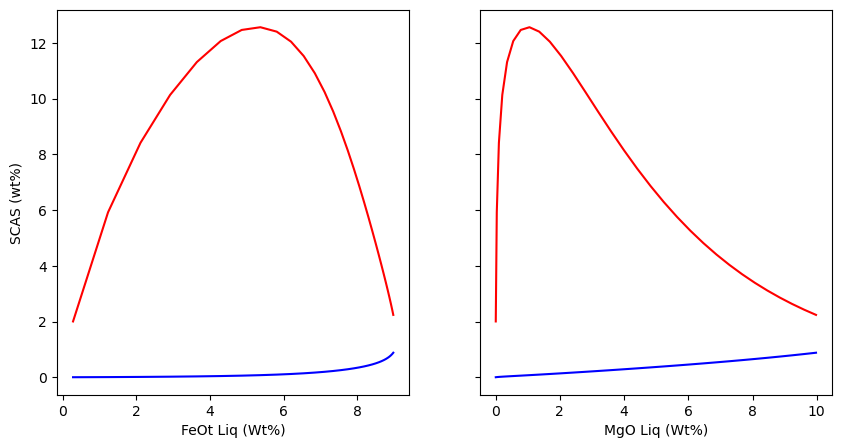

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.plot(CD19_SCAS['FeOt_Liq'], CD19_SCAS['Calc SCAS (ppm)']/10000, '-r', label='CD19')
ax2.plot(CD19_SCAS['MgO_Liq'], CD19_SCAS['Calc SCAS (ppm)']/10000, '-r', label='CD19')
ax1.plot(ZT22_SCAS['FeOt_Liq'], ZT22_SCAS['Calc SCAS (ppm)']/10000, '-b', label='CD19')
ax2.plot(ZT22_SCAS['MgO_Liq'], ZT22_SCAS['Calc SCAS (ppm)']/10000, '-b', label='CD19')
ax1.set_xlabel('FeOt Liq (Wt%)')
ax2.set_xlabel('MgO Liq (Wt%)')
ax1.set_ylabel('SCAS (wt%)')


Text(0, 0.5, 'SCAS (wt%)')

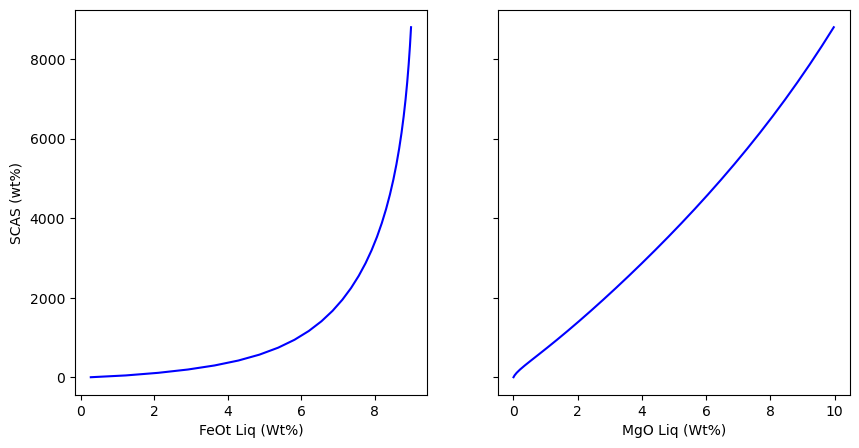

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.plot(ZT22_SCAS['FeOt_Liq'], ZT22_SCAS['Calc SCAS (ppm)'], '-b', label='CD19')
ax2.plot(ZT22_SCAS['MgO_Liq'], ZT22_SCAS['Calc SCAS (ppm)'], '-b', label='CD19')
ax1.set_xlabel('FeOt Liq (Wt%)')
ax2.set_xlabel('MgO Liq (Wt%)')
ax1.set_ylabel('SCAS (wt%)')


## Example 3 - Calculating amount of sulfide which has formed

In [29]:
help(ss.calculate_mass_frac_sulf)

Help on function calculate_mass_frac_sulf in module PySulfSat.sulf_mass_balance:

calculate_mass_frac_sulf(S_model=None, S_init=None, F_melt=None, S_sulf=None)
    Calculates mass fraction of sulfide removed for a given SCSS value, a S content in the melt,
    and S content in the sulfide
    
    Parameters
    --------------
    S_model: int, float, pd.Series
        modelled amount of S present in the melt in ppm (could be SCSS2-, SCSStot, or SCAS, or STot from another method)
    S_init: int, float, pd.Series
        initial S content of the system where F_melt=1 in ppm
    F_melt:  int, float, pd.Series
        melt fraction (between 0 and 1)
    S_sulf:  int, float, pd.Series
        S content of the sulfide in ppm
    
    Returns
    --------------
    Mass fraction of sulfide



In [30]:
# Get F from the Petrolog input
F_melt=df_out['Melt_%_magma']/100
# Select inital S content, from other knowledge of the system, highest S melt inclusion etc.
S_init=1600
# Amount of S in the sulfide
S_sulf=32*10**4
# Which SCSS model you have choosen
S_model=ONeill_FixedSulf['SCSS2_ppm']

In [31]:
Mass_Frac_S=ss.calculate_mass_frac_sulf(F_melt=F_melt,
            S_init=S_init, S_sulf=S_sulf, S_model=S_model)
Mass_Frac_S.head()

0    0.001508
1    0.001641
2    0.001775
3    0.001908
4    0.002041
dtype: float64

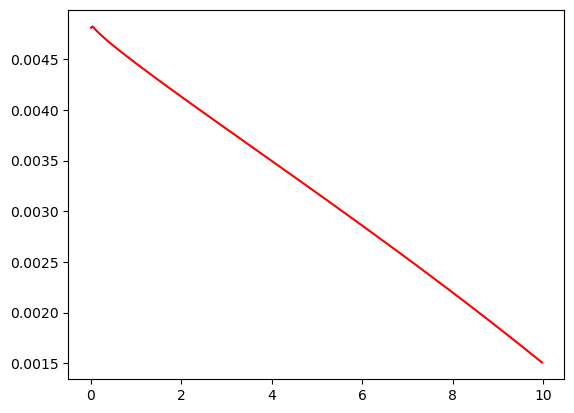

In [32]:
plt.plot(df_out['MgO_Liq'], 100*Mass_Frac_S, '-r')
plt.xlabel('MgO (wt%)')
plt.ylabel('Mass % sulfide')